# Support Vector Machines

"...using support vector machines (SVMs) to build a spam classifier"

## 1 Support Vector Machines

"In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets [to] help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs."

### 1.1 Example Dataset 1

#### Visualise the data

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from sklearn import svm
import math

In [2]:
data = scipy.io.loadmat('data/ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X = data['X']
y = data['y']

In [4]:
# take a peek at the data
X[:5]

array([[ 1.9643,  4.5957],
       [ 2.2753,  3.8589],
       [ 2.9781,  4.5651],
       [ 2.932 ,  3.5519],
       [ 3.5772,  2.856 ]])

In [5]:
X.shape

(51, 2)

In [6]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [7]:
y.shape

(51, 1)

In [8]:
y = y.flatten() # makes plotting easier, required for scikit-learn

In [9]:
def plot_data(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='y', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='+')
    plt.show()

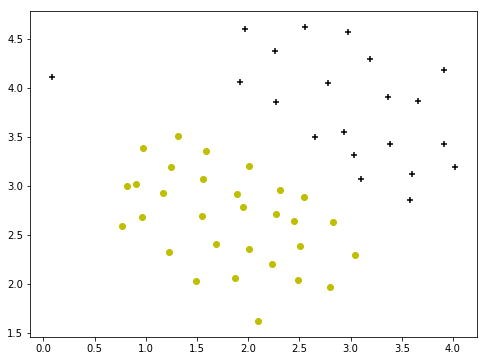

In [10]:
plot_data(X, y)

There's an obvious separarion indicated by the gap between the two classes, but there's also an outlying positive example (black plus) at ~(0.1, 4.1).

"As part of this exercise, you will also see how this outlier affects the SVM decision boundary."

#### Train linear SVM

The exercise provides a pre-written SVM training function written in Matlab/Octave. Until now I've been rewriting all the provided Matlab/Octave code in python, but this is becoming increasingly burdensome, so let's just use `scikit-learn`.

In [11]:
# Experiment with training the SVM with different values of regularisation parameter C.

model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
def plot_boundary_linear(X, y, model):
    
    # Plot data
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='y', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='+')

    # Plot decision boundary
    # https://stackoverflow.com/q/23794277/8291169
    # To plot decision boundary, y = a*x + b, do
    # weights W=svc.coef_[0]
    # intercept I=svc.intercept_
    # then
    # a = -W[0]/W[1]
    # b = -I[0]/W[1]
    
    a = -1 * model.coef_[0][0] / model.coef_[0][1]
    b = -1 * model.intercept_[0] / model.coef_[0][1]

    # https://stackoverflow.com/a/43811762/8291169
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, '--')

    plt.show()

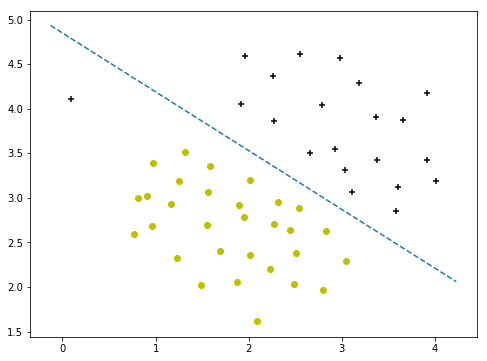

In [13]:
plot_boundary_linear(X, y, model)

The model has a good fit to the data, but wrongly predicts the outlier (not surprising). By increasing C we can increase the variance and deliberately overfit the data:

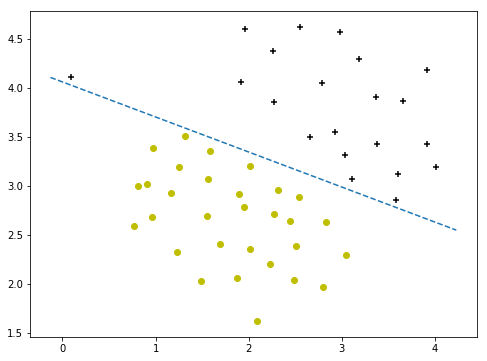

In [14]:
model = svm.SVC(kernel='linear', C=100)
model.fit(X, y)
plot_boundary_linear(X, y, model)

We've now deliberately overfit the data, and the outlier is predicted correctly, but the decision boundary seems less natural.

### 1.2 SVM with Gaussian Kernels

"...  using SVMs with Gaussian kernels on datasets that are not linearly separable."

#### 1.2.1 Gaussian Kernel

Build and test a Gaussian kernel:

In [15]:
def gaussian_kernel(x1, x2, sigma):
    '''
    Returns a gaussian kernel between x1 and x2
    and returns the value in sim
    '''
    
    sim = 0
    
    vec = x1 - x2
    mag = np.linalg.norm(vec)
    
    sim = math.exp(-1 * pow(mag, 2) / (2 * sigma**2))
    
    return sim

In [16]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussian_kernel(x1, x2, sigma)
print('%.6f' %sim)

# "...you should expect to see a value of 0.324652"

0.324652


#### 1.2.2 Example Dataset 2

In [17]:
data = scipy.io.loadmat('data/ex6data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [18]:
X = data['X']
y = data['y']

In [19]:
X[:5]

array([[ 0.107143 ,  0.60307  ],
       [ 0.093318 ,  0.649854 ],
       [ 0.0979263,  0.705409 ],
       [ 0.15553  ,  0.784357 ],
       [ 0.210829 ,  0.866228 ]])

In [20]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [21]:
y = y.flatten()

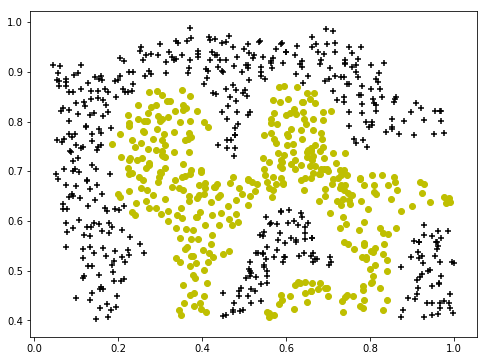

In [22]:
plot_data(X, y)

Non-linear decision boundary required, so we use a Gaussian kernel.

Getting `svm.SVC()` to work with my `gaussian_kernel()` function can be done, but is going to be inconvenient. `svm.SVC` has a built in Gaussian kernel called `rbf` (radial basis function) where the `gamma` parameter is equivalent to

`1 / 2 * sigma**2`

http://scikit-learn.org/stable/modules/svm.html#svm-kernels

so let's use that.

In [23]:
# sigma = 0.1 -> gamma = 50

model = svm.SVC(kernel='rbf', gamma=50, C=1)
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
def plot_boundary(X, y, model):
    
    # Based on the "official" plotting example from the scikit-learn people
    # http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
    
    X0 = X[:, 0]
    X1 = X[:, 1]
    
    ## Create grid of points to plot on
    x0_min, x0_max = X0.min() - 0.02, X0.max() + 0.02
    x1_min, x1_max = X1.min() - 0.02, X1.max() + 0.02
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.005),
                           np.arange(x1_min, x1_max, 0.005))
    # If you're having trouble visualising how meshgrid works:
    # https://stackoverflow.com/a/42404323/8291169
    
    
    ## Evaluate model predictions on grid
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    # This is a complicated bit of code!
    # np.c_ is just concatenation for slice objects (which our xx0 and xx1 are).
    # ravel just flattens, but uses less memory since it flattens the original
    # array rather than creating a copy like flatten().
    
    # z is flat, so need to reshape
    z = z.reshape(xx0.shape)
    
    ## And plot
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='y', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='+')
    plt.contour(xx0, xx1, z, 1, colors='b')

    plt.show()

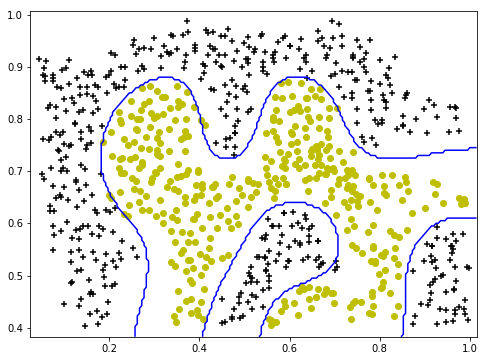

In [25]:
plot_boundary(X, y, model)

Using a Gaussian kernel we see that we can plot a non-linear boundary and achieve good separation between the two classes.

#### 1.2.3 Example Dataset 3

In [26]:
data = scipy.io.loadmat('data/ex6data3.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

We have both test data (X, y) and cross-validation data (Xval, yval).

In [27]:
X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

In [28]:
X[:5]

array([[-0.158986,  0.423977],
       [-0.347926,  0.47076 ],
       [-0.504608,  0.353801],
       [-0.596774,  0.114035],
       [-0.518433, -0.172515]])

In [29]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [30]:
y = y.flatten()
yval = yval.flatten()

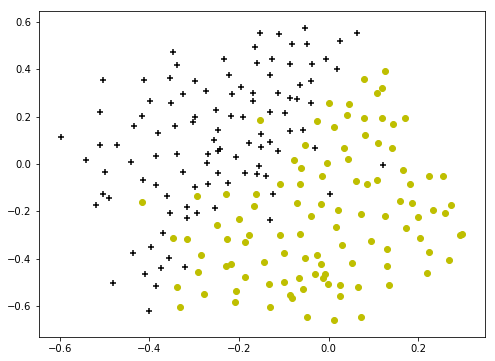

In [31]:
plot_data(X, y)

"Your task is to use the cross validation set Xval, yval to determine the best C and sigma [gamma in our case] parameter to use."

In [32]:
# For both C and σ, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
# Note that you should try all possible pairs of values for C and σ

In [33]:
# Let's try the following set of values for both C and sigma**2:
vals = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
C_vals = vals
gamma_vals = 1 / (2 * vals)

In [34]:
Xval[:, 1].shape

(200,)

In [55]:
# Train the SVM using all combinations of C, gamma

accuracy = 0
C_best = -1
gamma_best = -1

for C in C_vals:
    for gamma in gamma_vals:

        
        # Train SMV
        model = svm.SVC(kernel='rbf', gamma=gamma, C=C)
        model.fit(X, y)
        
        # Evaluate on cross validation set
        pred = model.predict(Xval)
        accuracy_temp = np.mean(pred == yval)

        if accuracy_temp > accuracy:
            accuracy = accuracy_temp
            C_best = C
            gamma_best = gamma
            
print('Best result found at C = %.2f, gamma = %.2f, with accuracy = %.2f%%.' %(C_best, gamma_best, accuracy*100))



Best result found at C = 1.00, gamma = 50.00, with accuracy = 96.50%.


In [49]:
print('%')

%
